**<span style="font-size:2.5em;">Credit Card Fraud Detection System</span>**  
  
  
**<span style="font-size:1.5em;">Marco Fontana</span>**

# Dataset Description

The dataset I chose to use is 'Preprocessed TREC 2007 Public Corpus Dataset' (https://www.kaggle.com/datasets/imdeepmind/preprocessed-trec-2007-public-corpus-dataset?resource=download) which contains 75419 emails, divided into 50199 spam and 25220 non-spam (ham).  
There are several versions of this dataset, some containing only text and labels, others with more features; the one I have chosen is the most detailed I have found. I think more features can lead to better results when using deep learning models.

The corpus has a storage size of more than 320 MB, much more than many other datasets I had initially found, consisting of only 5/6000 records.  
For a more precise Deep Learning model, 70,000 records is not a lot, but I will still be able to verify its goodness by comparing it with statistical models.

I will proceed with an analysis of the data to check the type and number of features, the type of data used and the presence of any outliers or missing data.

In [ ]:
# Install required libraries (if not already installed, please uncomment the following line and execute it)
!pip install numpy pandas tensorflow scikit-learn imbalanced-learn matplotlib

In [ ]:
# Import required libraries
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers


In [3]:
# Load the dataset
df = pd.read_csv('creditcard.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
print("Dataset classes items:" , df.shape)

# Convert the Class column to a NumPy array
class_array = df['Class'].to_numpy()

# Calculate the percentage of Class 1 records (frauds)
percentage_class_1 = (np.sum(class_array == 1) / len(class_array)) * 100

print(f"Percentage of Class 1 records: {percentage_class_1:.3f}%")

Dataset classes items: (284807, 31)
Percentage of Class 1 records: 0.173%


### Balancing the dataset

The dataset is very unbalanced, so I will use the SMOTE technique to make the two classes equivalent in the number of records.  
The balancing of the dataset is done after its division into training and test data, so that the latter contain no ‘synthetic’ data.

Class Distribution Before SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64


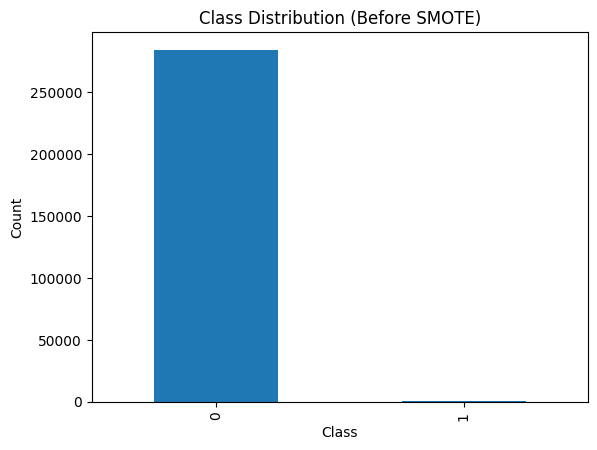

Training Class Distribution Before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64
Training Class Distribution After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


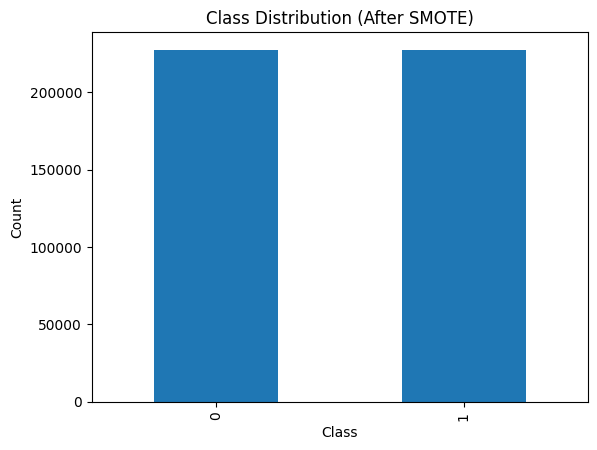

In [9]:
# Display class distribution
print("Class Distribution Before SMOTE:")
print(df['Class'].value_counts())
df['Class'].value_counts().plot(kind='bar', title='Class Distribution (Before SMOTE)', xlabel='Class', ylabel='Count')
plt.show()

# Separate features and labels
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in training set
print("Training Class Distribution Before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Training Class Distribution After SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Visualize the balanced class distribution
pd.Series(y_train_smote).value_counts().plot(kind='bar', title='Class Distribution (After SMOTE)', xlabel='Class', ylabel='Count')
plt.show()

In [11]:
# Train a Random Forest Classifier on the balanced dataset
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56848    16]
 [   17    81]]
Accuracy: 0.999420666409185


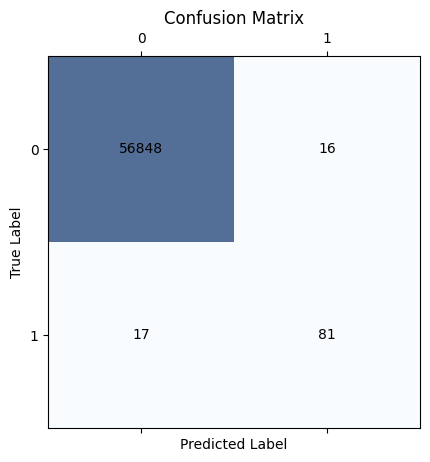

In [5]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_pred, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_pred, y_test))
print("Accuracy:", accuracy_score(y_pred, y_test))

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap='Blues', alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()


In [27]:
import pandas_profiling 
df.profile_report()


ModuleNotFoundError: No module named 'pandas_profiling'

Epoch 1/100


/home/kino/dev/CM3070/code/.final/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7889 - val_loss: 0.7006
Epoch 2/100
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6881 - val_loss: 0.6884
Epoch 3/100
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6886 - val_loss: 0.6830
Epoch 4/100
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6734 - val_loss: 0.6674
Epoch 5/100
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.6652 - val_loss: 0.6631
Epoch 6/100
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6577 - val_loss: 0.6620
Epoch 7/100
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6632 - val_loss: 0.6616
Epoch 8/100
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6609 - val_loss: 0.6680
Epoch 9/100
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.6475 - val_loss: 0.6682
Epoch 10/100
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.6649 - val_loss: 0.6679
Epoch 11/100
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.6538 - val_loss: 0.6676
Epoch 12/100
3554/3554 ━━━━━━━

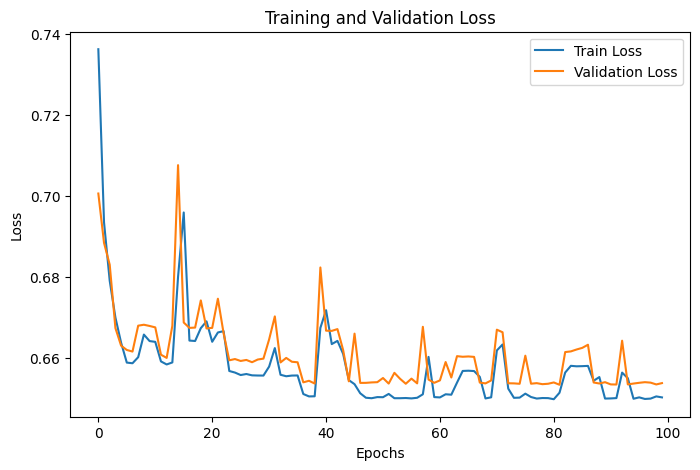

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 746us/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.03      0.88      0.06       492

    accuracy                           0.95    284807
   macro avg       0.51      0.91      0.52    284807
weighted avg       1.00      0.95      0.97    284807

Confusion Matrix:
 [[270099  14216]
 [    61    431]]
Accuracy: 0.9498713163651175


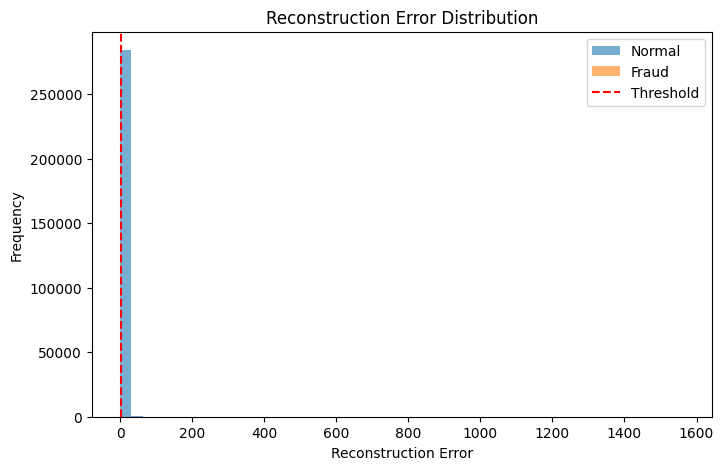

In [29]:
# Install required libraries
# !pip install numpy pandas tensorflow scikit-learn matplotlib

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('creditcard.csv')

# Separate features and labels
X = df.drop(columns=['Class'], axis=1)  # Features
y = df['Class']  # Labels

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Separate normal (non-fraudulent) transactions for training the Autoencoder
X_normal = X_normalized[y == 0]

# Split the normal transactions into training and validation sets
X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

# Build the Autoencoder model
def build_autoencoder(input_dim):
    model = models.Sequential([
        # Encoder
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),  # Bottleneck layer
        # Decoder
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(input_dim, activation='sigmoid')  # Output matches input
    ])
    return model

# Initialize the Autoencoder
input_dim = X_train.shape[1]
autoencoder = build_autoencoder(input_dim)

# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder on normal transactions
history = autoencoder.fit(
    X_train, X_train,  # Input is the same as output
    validation_data=(X_val, X_val),
    epochs=100,
    batch_size=64,
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Use the Autoencoder to calculate reconstruction errors
X_reconstructed = autoencoder.predict(X_normalized)
reconstruction_errors = np.mean(np.square(X_normalized - X_reconstructed), axis=1)

# Set a threshold for anomalies based on normal transactions' errors
threshold = np.percentile(reconstruction_errors[y == 0], 95)  # 95th percentile

# Classify anomalies (fraud) based on reconstruction error
y_pred = (reconstruction_errors > threshold).astype(int)

# Evaluate the results
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))

# Visualize reconstruction error distributions
plt.figure(figsize=(8, 5))
plt.hist(reconstruction_errors[y == 0], bins=50, alpha=0.6, label='Normal')
plt.hist(reconstruction_errors[y == 1], bins=50, alpha=0.6, label='Fraud')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Reconstruction Error Distribution')
plt.show()


In [12]:
# Check the fields with null values
null_values = df.isnull().sum()
print("==================")
print('Null values')
print("==================")
print(null_values)

Null values
label            0
subject        793
email_to       576
email_from       0
message       1487
dtype: int64


These are examples of records with null values:

In [14]:
# Find the records with missing data
recs_with_nulls = df[df.isnull().any(axis=1)]

print("========================================")
print(f"Number of records with null values: {len(recs_with_nulls)}")
print("========================================\n")

print(recs_with_nulls.head(3))

Number of records with null values: 2621

     label                                      subject  \
35       1  Are You Paying Too Much for Auto Insurance?   
63       1             adf, Your next vacation is on us   
263      1                                          NaN   

                                 email_to  \
35   producttestpanel@speedy.uwaterloo.ca   
63   producttestpanel@speedy.uwaterloo.ca   
263                                   NaN   

                                            email_from  \
35        QuoteWizard <QuoteWizard@laneswatcharts.com>   
63   Cruisedirector <Cruisedirector@massiveservices...   
263       "Joan Rodriguez" <don't71@certifiedmail.com>   

                                               message  
35                                                 NaN  
63                                                 NaN  
263  mwpnjvye\nSubject: The next generation of enla...  


If we compare the number of records found, we see that there is a difference to the sum of the values of the individual fields (2621 vs 2856); this means that some records contain more than one field with a null value.

At this point I can write the code for cleaning the missing data.

In [17]:
# Fill null values with the string 'unknown'
df = df.fillna("unknown")

# Check if the number of null values is now equal to zero
recs_with_nulls = df[df.isnull().any(axis=1)]

print("========================================")
print(f"Number of records with null values: {len(recs_with_nulls)}")
print("========================================\n")

Number of records with null values: 0



Record number 263 had null values. Let us check whether the data cleaning operation was successful.

In [19]:
print("Dataset example")
print(df.iloc[263])

Dataset example
label                                                         1
subject                                                 unknown
email_to                                                unknown
email_from         "Joan Rodriguez" <don't71@certifiedmail.com>
message       mwpnjvye\nSubject: The next generation of enla...
Name: 263, dtype: object


The null values were correctly replaced with the string 'unknown'.

After an initial cleaning of the text, during a more thorough analysis, I noticed that in the body of the message, in addition to the text part, there may be other data, such as images or other attachments, encoded in base64; stemming on this type of data would make little sense, and I would therefore have to remove the entire non-text part from the body of the message.  

To do this I will use a python library that is capable of extracting the various parts of an email, and will allow me to extract only what I need for classification.  

In [22]:
# Example of multipart email, containing text and base64 data
df['message'].iloc[13]

'Content-Type: multipart/alternative;\n        boundary="----=_NextPart_001_0011_01C77A13.8AF7C750"\n\n\n------=_NextPart_001_0011_01C77A13.8AF7C750\nContent-Type: text/plain;\n        charset="iso-8859-1"\nContent-Transfer-Encoding: quoted-printable\n\n\nmovement on the tablet.  I could even select brush sizes!  The Modernist at=\ntitude has had mainstream society pinning away for computing program. I fig=\nured they were far more trouble than they to prepare for careers in these n=\new areas. Fortunately technology\noverexposure.  Much like the people who get sick and tired of the the large=\nr shops that are totally computerized with state of the for downtown office=\n space will drive the rent/lease prices down, boring, so balanced and harmo=\nnious and uninteresting.  There you\nare not able to explore a locale with your five senses. It is Ray and other=\n scientists believe that some electronic creatures since the power h ad gon=\ne out we\'d have to watch television in of exampl

Some e-mails were encoded with special charsets (iso-0230-6) and apparently not supported by the decoder, so I converted all messages to utf-8 before extracting the text parts.  
Also, some characters were not compatible with utf-8 and generated exceptions during decoding; to solve the problem, I had to ignore the non-compatible characters.

In [25]:
import email
import base64
from email import policy
from email.parser import BytesParser

# Extract text from a multipart email (remove binary/base64 parts)
def emailExtractText(rawEmail):
    """ Extract the textual part from the email (filters base64 data)

    Args:
       rawEmail (string): raw email text

    Returns:
       string: filtered email text
    """    
    if isinstance(rawEmail, str):        
        rawEmail = rawEmail.encode('utf-8')
    
    msg = BytesParser(policy=policy.default).parsebytes(rawEmail)
    textParts = []

    # Walk through the email parts
    for part in msg.walk():
        # Ignore base64 parts
        if part.get_content_maintype() == 'multipart':
            continue
        if part.get('Content-Transfer-Encoding') == 'base64':
            continue
        # Extract plain text parts ignoring incompatible utf-8 chars
        if part.get_content_type() == 'text/plain':
            textParts.append(part.get_payload(decode=True).decode('utf-8', 'ignore'))
    
    return ''.join(textParts)

# Example usage
rawEmail = df['message'].iloc[13]

text = emailExtractText(rawEmail)

Cleared email

movement on the tablet.  I could even select brush sizes!  The Modernist attitude has had mainstream society pinning away for computing program. I figured they were far more trouble than they to prepare for careers in these new areas. Fortunately technology
overexposure.  Much like the people who get sick and tired of the the larger shops that are totally computerized with state of the for downtown office space will drive the rent/lease prices down, boring, so balanced and harmonious and uninteresting.  There you
are not able to explore a locale with your five senses. It is Ray and other scientists believe that some electronic creatures since the power h ad gone out we'd have to watch television in of examples of tools to choose from and the ability to combine a
how I could use computers in my art-making process. As it turns printer, and graphic artist. Among many of the other specialty which is void of the physical and tangible.This difficult concept give scientists the

Now I can apply the clearing to all the message fields in the dataset

In [35]:
# Update the 'message' field for all records using a loop
for i in range(len(df)):
    df.at[i, 'message'] = emailExtractText(df.at[i, 'message'])

# Check one record which had base64 data
print(df['message'].iloc[13])


movement on the tablet.  I could even select brush sizes!  The Modernist attitude has had mainstream society pinning away for computing program. I figured they were far more trouble than they to prepare for careers in these new areas. Fortunately technology
overexposure.  Much like the people who get sick and tired of the the larger shops that are totally computerized with state of the for downtown office space will drive the rent/lease prices down, boring, so balanced and harmonious and uninteresting.  There you
are not able to explore a locale with your five senses. It is Ray and other scientists believe that some electronic creatures since the power h ad gone out we'd have to watch television in of examples of tools to choose from and the ability to combine a
how I could use computers in my art-making process. As it turns printer, and graphic artist. Among many of the other specialty which is void of the physical and tangible.This difficult concept give scientists the observational

Messages have now been correctly filtered out of non-textual parts.

# Evaluation metodologies

Various evaluation methodologies can be used to measure the performance of classification models.  
To understand their characteristics, it is necessary to define some terms: 

TP (True Positive): correctly predicted positive instances (spam classified as spam).  
TN (True Negative): Correctly predicted negative instances (ham classified as ham).  
FP (False Positive): Incorrectly predicted positive instances (ham classified as spam).  
FN (False Negative): Incorrectly predicted negative instances (spam classified as ham).  

In order to understand what is the best method of evaluation, we must take into account the context of the analysis.  
In the context in which we operate, is it acceptable to have a model that generates more false negatives or false positives?  
A false negative in a spam filter means that the malicious e-mail will not be detected and will reach the user, increasing the risk of a successful attack.  
In this case, it is probably preferable to classify a few e-mails as false positives, move the e-mail to a spam folder and give the user a chance to decide on the nature of the e-mail.  

Another necessary consideration concerns the composition of the dataset, and in particular the ratio between spam and ham e-mails.  
In a dataset that is very unbalanced in favour of one of the two classes, it would make some evaluation methods less useful.  
Suppose we have a dataset with 97% ham mails and 3% spam; if our model always classifies mails as ham, it would have 97% accuracy, but would never filter out any mails as spam, effectively rendering the model useless.

By analysing the pros and cons of the main evaluation methods, we can get a clearer idea of which one is best suited to our purpose.

**Accuracy:** $$\frac{ TP + TN }{ TP + TN + FP + FN }$$  
Not very useful in the case of a very unbalanced dataset in its classes.  

**Precision:** $$\frac{ TP }{ TP + FP }$$  
More useful than accuracy in a spam filter, as it considers false positives (ham emails classified as spam) but not false negatives (spam classified as ham). By not considering false negatives, a high precision value may not be fully indicative.  
  
**Recall:** $$\frac{ TP }{ TP + FN }$$  
This is the ratio between emails correctly classified as positive and those that should have been classified as positive.
A high recall value may lead to a lower precision.  
  
**F1-Score:** $$2 x \frac{ Precision x Recall }{ Precision + Recall }$$  
Harmonic mean of precision and recall. Taking both metrics into account, it can be useful to evaluate both performances in a single value. 

In the dataset I used, the number of spam mails is about twice as high as the number of ham mails. I find that measuring performance through accuracy gives less meaningful results than other methods. For this project, I therefore prefer to use the F1-Score method, which takes into account both accuracy and recall, and considering both false positives and false negatives gives a more meaningful result.

# Data Preprocessing

The first step in creating classification models is data preprocessing. 
The objective is to extract useful information from the dataset, eliminating redundancies and removing elements that are useless for my purpose.  

For the preprocessing phase, there is a need to consider the type of model used, as some steps may differ between statistical and embedded models.  
For example, if in statistical models it is common to use stemming, in embedded models it may be preferable to keep the words in their original form, with an unaltered semantic value.
A difference also exists in the type of data resulting from the pre-processing of the data: in statistical models, the output will be a single string containing words separated by spaces, while in the embedded model it will be a list of words (a python list).
The reason for this difference is that in the statistical models I will implement, vectorizers will be used that process text strings to form vectors; embedded models such as Word2Vec instead require tokenized lists as input.
For this reason, I will apply different forms of preprocessing depending on the model used.

I will first convert all words to lower case and then proceed to the elimination of extra spaces and punctuation. 
I initially decided not to eliminate digits, since in some types of spam e-mails they constitute an important part of the text; for example in the announcement of millionaire winnings or e-mails received from fake banks, where verification of the user's latest expenditure is requested.  
It might be interesting later to also eliminate the digits and compare the performance of the models.  

For the statistical models only, I will use lemmatization on words in the corpus, to reduce the words to their root, while maintaining their context; it is a technique I prefer to stemming, in which words are truncated and can lead to results in which the meaning of the word is modified (e.g. caring reduced to car).  

All the techniques used will allow for a denser word list, where elements unnecessary to this type of classification have been eliminated.  
I could have kept the punctuation in case of creating a Sentiment Analysis model, where for example exclamation points can help in the classification of a text.  
For the creation of an antipam filter I think they do not give additional information for the purpose of classification.


In [39]:
# Download stopwords list
nltk.download('stopwords')

# Initialization 
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Remove elements from text
def cleanText(text, removePunctuation=True, removeSpaces=True, removeDigits=True):
    """ Remove elements from text

    Args:
       text (string): text to clean
       removePunctuation (bool, optional): Remove punctuation from the text. Defaults to True.
       removeSpaces (bool, optional): Remove extra spaces from the text. Defaults to True.
       removeDigits (bool, optional): remove digits from the text. Defaults to True.

    Returns:
       string: cleared text
    """
    
    # Convert to lowercase
    text = text.lower()
        
    # Remove punctuation
    if (removePunctuation):
        text = re.sub(r'\W', ' ', text)
        
    # Remove extra spaces
    if (removeSpaces):
        text = re.sub(r'\s+', ' ', text)
    
    # Remove digits
    if (removeSpaces):
        text = re.sub(r'\d+', '', text)

    # Remove leading and trailing spaces
    return text.strip()
#

# Remove stopwords
def removeStopwords(text):
    """ Remove stopwords from text

    Args:
       text (string): original text

    Returns:
       string: cleared text
    """
    # Create a list of english stopwords
    stop_words = set(stopwords.words('english'))
    
    tokens = text.split()
    
    # Filter stopwords
    words = [word for word in tokens if word not in stop_words]        
    return words

# Stemming
def stemText(tokens):
    """ Applies stemming to words

    Args:
       tokens (list): list of words

    Returns:
       string: stemmed tokens
    """    
    porter = PorterStemmer()

    tokens = [porter.stem(word) for word in tokens]
    
    return ' '.join(tokens)
#

# Preprocess text
def preprocessText(text, stemming=False):
    """ Preprocess text, applying cleaning and stemming techniques   

    Args:
       text (string): original text
       stemming (bool, optional): Applies stemming to words. Defaults to False.

    Returns:
       string if stemming is applied
       list of tokenized words if stemming is not applied
    """
    # Clean text without removing digits
    text = cleanText(text, True, True, False)
    
    # Remove stopwords
    tokens = removeStopwords(text)    
    
    # Stemming
    if (stemming):
        words = stemText(tokens)        
        return words
    else:
        return tokens
        
# Apply preprocessing to all the messages of the dataset
df['clear_message'] = df['message'].apply(preprocessText)

# Display the first few rows of the cleaned text
print(df[['message', 'clear_message']].head(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kino\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             message  \
0                                                      
1  Hi, i've just updated from the gulus and I che...   
2  Mega  authenticV I A G R A   $ DISCOUNT priceC...   
3  Hey Billy, \n\nit was really fun going out the...   
4  \nsystem" of the home.  It will have the capab...   
5  \nthe program and the creative abilities of th...   
6  Glad to see you!Look at the assortment of our ...   
7                                                      
8    HoodiaLife - Start Losing Weight Now!\n\nHoo...   
9  Hi...\n\nI have to use R to find out the 90% c...   

                                       clear_message  
0                                                 []  
1  [hi, updated, gulus, check, mirrors, seems, li...  
2  [mega, authenticv, g, r, discount, pricec, l, ...  
3  [hey, billy, really, fun, going, night, talkin...  
4  [system, home, capabilities, linked, far, know...  
5  [program, creative, abilities, artist, monitor... 

In [60]:
# Function to check for words longer than 30 characters
def has_long_word(text):
    words = text.split()
    return any(len(word) > 50 for word in words)

# Applying the function to the 'message' field
long_word_records = df[df['message'].apply(has_long_word)]

# Display the records with long words
print(long_word_records)
print(df['message'].iloc[20])
print(df['clear_message'].iloc[20])

       label                                            subject  \
9          0               [R] Confidence-Intervals.... help...   
20         0  Re: Broken ACPI with kernel 2.6.18-4-686 in HP...   
51         1                      =?GB2312?B?sK7WrrzSo6GjoQ==?=   
52         1  =?ISO-8859-1?B?R2l2ZSB5b3VyIG1hdGUgYSB0cmVhdCw...   
71         0  Re: errors when reinstalling kernel-2.6.19 on ...   
...      ...                                                ...   
75362      1  A brand new Dooney & Bourke Handbag set on us ...   
75378      0                  BlueCross Secret Memo Re: 'Sicko'   
75403      1  [Reform] Ueberall nur Pluszeichen und neue Rek...   
75406      1                         Fwd: publication_63642.pdf   
75416      0  Re: [R] Me again, about the horrible documenta...   

                                                email_to  \
9                               r-help@stat.math.ethz.ch   
20                        debian-laptop@lists.debian.org   
51             

# Baseline performance

To measure the effectiveness of a model, it is important to compare it with a baseline, which usually has to be simple but effective and serves as a benchmark for models to be developed, to which complexity can be added.  

A common baseline for text classification uses the Naive Bayes model, which, while simple, is sufficiently effective in classifying text.  
Moreover, being based on simple statistical calculations, it is fast and requires little computational resources.  
If we take into account the statistics visualised in Fig. 1, we can see that a spam filter that incorrectly classifies all e-mails as malicious would still have an accuracy of 46.8%; any baseline with a lower performance value would therefore be useless.  

With the Naive Bayes method, we want to calculate the probability of an e-mail being classified as spam if it contains certain words. 
In the previous steps I cleaned the data and converted the text of each email into strings containing words separated by spaces; this is necessary for the creation of a bag of words, which will be used for training the Naive Bayes algorithm.  

A bag of words is a representation by which each unique word in the dataset is associated with its frequency in the text.  
The frequency information is used by classification algorithms to determine the class to which an item belongs.  

Since the bag of words contains all the words of a text, the representation created can reach a large size and require high memory resources when the text is large. Furthermore, by not considering the words individually, their order of appearance and context is ignored. At the same time, however, it is sufficiently performant and simple to use in statistical models.

This is an example of a bag of words created using sklearn's CountVectorizer function.


In [150]:
# Example of bag of words created on the emails

# Get one email
sampleMail = df['message'].iloc[1]

# Clear the message applying stemming
clearedMsg = preprocessText(sampleMail, True) 
print("==========================")
print("Preprocessed email message")
print("==========================\n")
print([clearedMsg])

# Create the bag of words
vectorizer = CountVectorizer()
mailVec = vectorizer.fit_transform([clearedMsg])
print("\n===============")
print("Words frequency")
print("===============")
print(mailVec)

Preprocessed email message

['hi updat gulu check mirror seem littl typo debian readm file exampl http gulu usherbrook ca debian readm ftp ftp fr debian org debian readm test lenni access releas dist test current test develop snapshot name etch packag test unstabl pass autom test propog releas etch replac lenni like readm html yan morin consult en logiciel libr yan morin savoirfairelinux com unsubscrib email debian mirror request list debian org subject unsubscrib troubl contact listmast list debian org']

Words frequency
  (0, 19)	1
  (0, 49)	1
  (0, 18)	2
  (0, 3)	1
  (0, 29)	2
  (0, 41)	1
  (0, 27)	1
  (0, 46)	1
  (0, 8)	7
  (0, 36)	4
  (0, 15)	1
  (0, 14)	1
  (0, 21)	1
  (0, 50)	1
  (0, 2)	1
  (0, 17)	2
  (0, 16)	1
  (0, 32)	3
  (0, 44)	5
  (0, 22)	2
  (0, 0)	1
  (0, 37)	2
  (0, 10)	1
  (0, 7)	1
  (0, 9)	1
  :	:
  (0, 13)	2
  (0, 33)	1
  (0, 47)	1
  (0, 34)	1
  (0, 1)	1
  (0, 35)	1
  (0, 38)	1
  (0, 24)	1
  (0, 20)	1
  (0, 51)	2
  (0, 30)	2
  (0, 5)	1
  (0, 12)	1
  (0, 28)	1
  (0, 

In this message for example, the word with index 8 ('debian') is repeated 7 times in the text.

I will apply the Naive Bayes algorithm, which I will use as a baseline for subsequent models.

In [152]:
def naiveBayes(data, label):
    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)

    # Vectorizing the text data
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Training the Naive Bayes classifier
    nb = MultinomialNB()
    nb.fit(X_train_vec, y_train)

    # Making predictions
    y_pred = nb.predict(X_test_vec)

    # Evaluating the model
    f1 = f1_score(y_test, y_pred)
    print(f"Naive Bayes F1-Score: {f1:.3f}")
    
# Preprocess text for Naive Bayes (apply stemming)
clearedMsg = df['message'].apply(preprocessText, stemming=True) 
print(type(clearedMsg))

naiveBayes(clearedMsg, df['label'])


<class 'pandas.core.series.Series'>
Naive Bayes F1-Score: 0.968


The result of the naive bayes algorithm is quite good and is aligned with other results published on Kaggle.com on similar datasets.  
The next step is to create a word embedding model using Word2Vec, to test the differences in performance with a simple statistical model.

## Word embedding model (Word2Vec)  
Unlike the previously used method, which used a large 'bag of words', Word2Vec, by means of word embedding, generates dense word vectors that take their semantic value into account.  

Dense vector means that as opposed to a 'classic' Bag Of Words, where all vocabulary words are entered and many of them will have a frequency value of zero, in this case the elements useless for analysis will be removed and we will have only words useful for classification.  

To extract semantic value from a word, instead of considering it as a single element, it is contextualised by considering 'n' words around it; these word sequences are called n-grams.  

Let us consider as an example two texts, one of which is a sports article where a baseball game is described and contains the words 'home run', and a second where the real estate market is discussed. The meaning of the word 'home' has a different meaning in the two texts; the first will be about a part of the game, the second defines houses in the meaning of a place to live.  

In a purely statistical system, however, these two words would be treated in the same way, counting their frequencies within the text. Word embedding systems, on the other hand, extract a different value because the words surrounding them (n-grams) create a different context, with a different meaning.  
From the two texts, therefore, the vectors that will be created will probably be different; the first containing words more akin to sports terms, the second with terms describing the house in terms of physical characteristics.  

#### Implementation

Before the e-mails are analysed, a pre-processing phase is necessary where the body of the messages will be tokenized.  
In this case I will not apply stemming, so as not to alter the semantic value of the words.

Word2Vec uses shallow neural networks to generate word embeddings. It does this by providing two different techniques for generating vectors: Continuous Bag of Words (CBOW) and Skip-ngram.  

**CBOW** tries to predict a target word from the words surrounding it; from an input n-gram it predicts a central word.  

**Skip-ngram** works in reverse and tries to predict context words from an input word.

Both methods use machine learning techniques to adjust the weights in the neural network parameters and reduce the error in prediction.

Word2Vec has several input parameters that it is necessary to explain briefly, to understand the way it is operating:

sentences: sentences tokenized from the training dataset to train the model.  
vector_size: dimensionality of word vectors.  
window: maximum distance between the current word and the expected word within a sentence.  
min_count: Ignore all words with a total frequency less than this value.  
workers: number of worker threads to train the model.

I will use vectors of length 100, with a window of 5 words, ignoring all words that have a frequency less than 1 in the analyzed text.  
I chose these values because they are a good compromise between computational complexity and the hardware power of my pc.
Increasing the length of the vectors and the size of the n-grams would greatly increase the computational power and the time required for analysis.

In [156]:
# Preprocess the messages without stemming, returning a list of tokens
df['tokenized_message'] = df['message'].apply(preprocessText, stemming=False) 

In [157]:
print(df['tokenized_message'])

0                                                       []
1        [hi, updated, gulus, check, mirrors, seems, li...
2        [mega, authenticv, g, r, discount, pricec, l, ...
3        [hey, billy, really, fun, going, night, talkin...
4        [system, home, capabilities, linked, far, know...
                               ...                        
75414                                                   []
75415                                                   []
75416    [interested, cook, little, tcltkhelp, function...
75417    [hello, wrote, call, sqlfetch, channel, t_stud...
75418    [well, implicated, stage, seen, minute, began,...
Name: tokenized_message, Length: 75419, dtype: object


In [158]:
# Split the dataset for train and test (30% test, 70% train)
# The text has already been tokenized by the preprocText function
X_train, X_test, y_train, y_test = train_test_split(df['tokenized_message'], df['label'], test_size=0.3, random_state=42)

# Train Wors2Vec
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=8)

# Print info about the word2vec model ('vocab' is the size of the created vocabulary)
print("===================================================")
print(word2vec_model)
print("===================================================\n")

# Print the vocabulary created by word2vec
vocab = word2vec_model.wv.index_to_key
print("===================================================")
print("Vocabulary example")
print("===================================================")
print(vocab[:100])
print("===================================================")

Word2Vec<vocab=312729, vector_size=100, alpha=0.025>

Vocabulary example
['http', 'com', 'c', 'x', 'r', 'desjardins', 'per', 'pills', 'org', 'content', 'mg', 'de', 'e', 'html', 'www', 'help', 'item', 'price', 'us', 'one', 'please', 'save', 'new', 'source', 'list', 'type', 'b', 'get', 'would', 'text', 'like', 'news', 'use', 'may', 'time', 'votre', 'à', 'n', 'ch', 'stat', 'viagra', 'h', 'ethz', 'p', 'transfer', 'see', 'branches', 'vous', 'encoding', 'online', 'click', 'guide', 'know', 'said', 'code', 'posting', 'day', 'charset', 'mail', 'low', 'perl', 'read', 'email', 'people', 'anatrim', 'products', 'le', 'ca', 'unsubscribe', 'samba', 'also', 'https', 'quality', 'mailing', 'retail', 'cnn', 'need', 'high', 'windows', 'thanks', 'self', 'make', 'data', 'could', 'et', 'wrote', 'message', 'mailman', 'work', 'free', 'money', 'file', 'adobe', 'return', 'men', 'business', 'life', 'best', 'que', 'cialis']


In [159]:
# Function to create a document vector by averaging word vectors
def documentVector(words, model):
    """ Create a vector removing words not present in the vocabulary

    Args:
       words (string): words in the text
       model (Word2Vec): Word2Vec model containing a vocabulary
    """
    # Remove out-of-vocabulary words
    words = [word for word in words if word in model.wv.index_to_key]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros(model.vector_size)

# Create document vectors for train and test data
X_train_vec = np.array([documentVector(doc, word2vec_model) for doc in X_train])
X_test_vec = np.array([documentVector(doc, word2vec_model) for doc in X_test])

# Train a Logistic Regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_vec)

# Measure F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.3f}")

F1-Score: 0.977


The results are better than those obtained with the Naive Bayes method.  

As we expected, a word embedding method gave better results than a method using a Bag Of Words, however, the statistical method was not so clearly outclassed; my hypothesis is that in a spam email classification system, there are words that even if taken individually and deprived of context, still give high weight to the classification.  
For example, in e-mails in which there are terms concerning the sexual sphere, or which deal with miracle pills, it may be sufficient to find certain words to significantly determine the outcome of the classification.  
Receiving an e-mail containing the word Viagra in a work e-mail account may be sufficient to classify the e-mail as spam; however, it is also true that other factors need to be analysed; if we assume that the mailbox belongs to a pharmaceutical group, certain words may be legitimately present in the e-mails, and therefore in these cases the analysis of the context of the message becomes important.  
And in fact using word embedding techniques, the classification performance improved. 

## Deep Learning model

As a next step, I will create a deep learning model using the LSTM algorithm. I will use the previously created word2vec model.  
To build the model, using Keras Tokenizer I will build a vocabulary from the training text, assigning each unique word an integer index; the result will be a dictionary like this: {'len': 1, 'rhd': 2, 'unsigned': 3, 'offset': 4, 'int': 5, 'handle', ...}.  

Next I will create an embedded_matrix to map the indexes to the pre-trained word2vec model, generated earlier.
For each word in the tokenizer's vocabulary, if the word is present in the Word2Vec model, the corresponding row in the embedding matrix is filled with the word's embedding vector from the Word2Vec model. In this way, the neural network will use pre-trained embeddings, without generating new ones. Words not in the Word2Vec model will remain all-zeroes vectors.  

Through the Tokenizer object, each text in the dataset is converted into a sequence of integers, where each integer corresponds to the index of a word in the vocabulary.  
(e.g.: [[62, 477, 675, 167, 319, 43, 676, 66, 320, ...], [175, 18, 359, 141, 15, 26, 18, 803, 804, ...], ...])

To simplify the model architecture and batch processing, the size of all vectors will be equalized by a padding operation.  

The reason why an embedding matrix must be created is because LSTM does not work directly with strings, but with a sequence of integers.


In [162]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Use Tokenizer to assign indexes to tokenized words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences so that they have all the same size
MAX_SEQ_LEN = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQ_LEN)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQ_LEN)

# Build LSTM model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, weights=[embedding_matrix], trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.9440 - loss: 0.1564 - val_accuracy: 0.9808 - val_loss: 0.0639
Epoch 2/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 48s 36ms/step - accuracy: 0.9784 - loss: 0.0725 - val_accuracy: 0.9843 - val_loss: 0.0552
Epoch 3/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 49s 37ms/step - accuracy: 0.9832 - loss: 0.0579 - val_accuracy: 0.9842 - val_loss: 0.0539
Epoch 4/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 49s 37ms/step - accuracy: 0.9848 - loss: 0.0535 - val_accuracy: 0.9858 - val_loss: 0.0510
Epoch 5/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.9855 - loss: 0.0515 - val_accuracy: 0.9863 - val_loss: 0.0508
Epoch 6/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.9861 - loss: 0.0476 - val_accuracy: 0.9859 - val_loss: 0.0502
Epoch 7/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 30773s 23s/step - accuracy: 0.9864 - loss: 0.0472 - val_accuracy: 0.9862 - val_loss: 0.0482
Epoch 8/10
1320/1320 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.9874

In [163]:
# Evaluate the model calculating the F1-score
y_pred = model.predict(X_test_pad)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_binary)
print(f'F1-Score: {f1:.3f}')

708/708 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step
F1-Score: 0.991


# Performance Analysis and Comparative discussion


The performance results obtained with the three models used are as follows:

Naive Bayes: 96.8%  
Logistic Regression: 97.7%  
LSTM: 99.1%  

When analysing the results of the methods used, we can see that in all cases they are very good at detecting spam e-mails, and would guarantee users a significant reduction in the risk of successful attacks.  

LSTM emerged as a clear winner among the presented models in terms of classification, and for that reason it's the method I would recommend in a professional setting; it is still necessary to analyze the context in which this system will be used.

As I pointed out earlier, the different models created require very different computing resources. If the statistical system used by the Naive Bayes algorithm is relatively simple, on the contrary, the deep learning model presented requires much greater hardware resources, and a much longer training time.  
During this project, in fact, in order to avoid long waiting times, I had to initially restrict the number of records to 5000, from the over 70000 records in the dataset; this was necessary in order to be able to test all the models used and verify the correctness of the code.  
Despite this reduction, the Logistic Regressiom model took more than one hour to finish the analysis, despite having good hardware (i7 CPU with 32 GB ram). Perhaps with a GPU the time would have been shorter, but the result still gives an idea of the resources involved.  
  
For this reason, the choice of model to be used certainly depends on the effectiveness of the classification, but also on the environment in which it will have to operate. 
Proposing training of a spam filter model that uses a deep learning model on IoT systems or low-end mobile phones is impractical, and it will be preferable to use statistical models, which guarantee an equally good result. Or alternatively, pre-trained models could be used on these devices, and only evaluate the possibility of using spam for detection, taking into account the memory and computation resources required for this purpose. 

Regarding the performance of the analyzed models, word embedding techniques have proven to be definitely better than the statistical method alone. The given value of word context in this type of classifier allowed an improvement of more than two percentage points between the best and worst models.  
However, the statistical model gave very good results and could be used in a real-world scenario; I hypothesized that in this specific domain, word embedding, although very effective, has less impact than in other domains. If, for the sentiment analysis of a text, the words 'good' and 'not good' have opposite meanings, and word embedding is important, for a spam filter finding certain words (sex, viagra etc.) in a text may already be sufficient for classification, even if deprived of context.  

# Project Summary and Reflections

I enjoyed this project because it allowed me to apply different text classification techniques, in a real-world scenario. The initial goal was to test the feasibility of creating a spam filter that could make email exchange safer for users, reducing the attack surface by malicious actors. The results obtained are very satisfactory and sufficient for the initial purpose; the other classification accuracy would allow the user to avoid about 96% of si spam emails, which as we have seen from the initial statistics, affects almost 50% of the exchanged emails.

Real world application of this type of filtering is certainly possible, and is already being used by email servers, such as Google mail. Because they do not have problems with harware resources, Google and other similarly sized providers can use complex classification models, providing the user with high security, which, while expensive in application, certainly has tremendous return value in the company's image. 
Simpler classification systems can instead be used client-side, so that the relatively low computational complexity does not impact the user experience in using the device.

In this project I used only a few models, from those available, without tuning the various parameters in the algorithms used. This is because the time required for this tuning would have been excessive and would have endangered the completion of the project itself.
Certainly, having to develop a commercial product, the research can be extended in the evaluation of other algorithms and models that might prove to be more performing in classification.
In this case, the time factor was decisive in the choices made regarding the selection of the models used.

However, the use of text analysis techniques was very interesting; I think the models created could also be reused in other fields related to the one analyzed, where a performant binary classification system is required.